<a href="https://colab.research.google.com/github/rapu34/A1_performance_factory_Aveners/blob/main/EDA_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
log = pd.read_csv("/content/drive/MyDrive/A1project/log_csv.csv", encoding='UTF8')

In [ ]:
#서울 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 
#대구 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 
#부산 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물
#지역별 category는 딱히 특이사항 없어보임.

# i)가구 구매시
# viewrate 100%비율이 높음
# viewtime은 짧게 가져가는 편 
# 3001     15331
# 3002     12878
# 3003      8275

# ii) 가구 action type
# View         1738586
# Highlight     155026
# Basket         46142
# Copy           30128
# SINF            7152

In [4]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [5]:
log.isnull().sum()

Unnamed: 0              0
uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [7]:
log = log.dropna(subset=['uid'])
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [8]:
log['viewrate'].value_counts()

100.00    4315772
0.00      1131730
99.91        7026
99.90        3378
99.93        1938
           ...   
79.76           1
1.58            1
83.85           1
79.72           1
2.25            1
Name: viewrate, Length: 1900, dtype: int64

In [9]:
log.isnull().sum()

Unnamed: 0              0
uid                     0
action_type             0
category1               0
category2               0
category3          766812
collect_time            0
geoip_city_name    398912
useragent_os            0
viewrate             2375
viewtime                0
dtype: int64

In [10]:
log.action_type.value_counts()

View         4742714
Highlight     443100
Basket        166914
Copy          100588
SINF           19912
Name: action_type, dtype: int64

In [11]:
log.geoip_city_name.value_counts()

Seoul                 871681
Daegu                 232960
Incheon               192053
Busan                 186777
Seongnam-si           172638
                       ...  
Montclair                  1
Huntington Station         1
Plymouth                   1
Tracy                      1
Misawa                     1
Name: geoip_city_name, Length: 2760, dtype: int64

In [12]:
region = log.geoip_city_name.value_counts()
region = region.reset_index()
region[:100]

,index,geoip_city_name
0,Seoul,871681
1,Daegu,232960
2,Incheon,192053
3,Busan,186777
4,Seongnam-si,172638
...,...,...
95,Yeongcheon-si,6723
96,Suseong-gu,6499
97,Tangjin,6407
98,Haeundae-gu,6105


In [15]:
#특이사항 ->한국이 아닌 도시 참고
region[:200] 
#Ho Chi Minh City	897
#Tokyo	882

,index,geoip_city_name
0,Seoul,871681
1,Daegu,232960
2,Incheon,192053
3,Busan,186777
4,Seongnam-si,172638
...,...,...
195,Yecheon-gun,870
196,Haeundae,820
197,Puan,789
198,Tokyo,757


array(['Seongnam-si', 'Yongin-si', 'Seoul', ..., 'Pine Bush', 'Hikone',
       'Misawa'], dtype=object)

In [17]:
log.loc[log['geoip_city_name']=='Seoul', 'category1'].value_counts() #서울 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 

가구        327149
패브릭        97009
가전·디지털     95334
주방용품       74829
데코·식물      59619
           ...  
더존테크           1
베디스            1
피너츠            1
리우리빙           1
올리그로우          1
Name: category1, Length: 1116, dtype: int64

In [18]:
log.loc[log['geoip_city_name']=='Seoul', 'viewtime'].value_counts() 

0         189197
3001        7151
3002        5664
2002        3350
3003        3314
           ...  
286263         1
65166          1
154253         1
49228          1
166167         1
Name: viewtime, Length: 142585, dtype: int64

Text(0, 0.5, '')

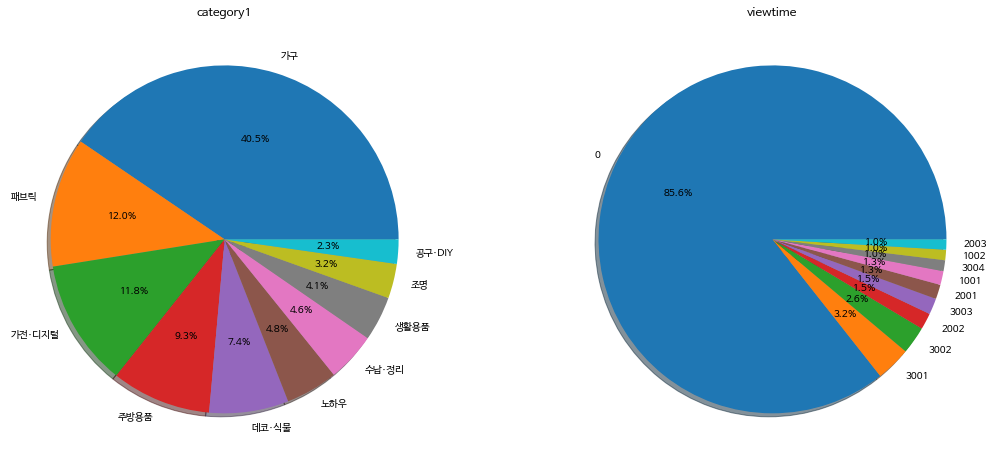

In [19]:
f, ax = plt.subplots(1, 2, figsize = (18, 8)) #Category1,2시각화해서 확인 -> 가구에서 viewtime을 보고자했으나 실패
log.loc[(log.geoip_city_name == 'Seoul'), 'category1'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=True);
ax[0].set_title('category1')
ax[0].set_ylabel('')

log.loc[(log.geoip_city_name == 'Seoul'), 'viewtime'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[1], shadow=True);
ax[1].set_title('viewtime')
ax[1].set_ylabel('')

In [43]:
log.loc[log['geoip_city_name']=='Daegu', 'category1'].value_counts() #대구 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 

가구         82512
패브릭        31099
가전·디지털     25545
주방용품       23099
데코·식물      16313
           ...  
아보드            1
살림의기술          1
구디푸디           1
HICKIES        1
리빙힙            1
Name: category1, Length: 358, dtype: int64

In [44]:
log.loc[log['geoip_city_name']=='Incheon', 'category1'].value_counts() #대구 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 

가구           72676
패브릭          23397
주방용품         16938
가전·디지털       16265
데코·식물        14790
             ...  
mellbrown        1
보노하우스            1
아씨방가구            1
테이스티드            1
에이스침대            1
Name: category1, Length: 525, dtype: int64

In [45]:
log.loc[log['geoip_city_name']=='Busan', 'category1'].value_counts() #부산 category1: 가구> 패트릭> 가전.디지털>주방용품> 데코.식물 

가구         68256
패브릭        22091
주방용품       18590
가전·디지털     17074
데코·식물      12960
           ...  
쁘띠메종           1
몽목             1
모던탑21          1
아빠가만든공간        1
필플랜트           1
Name: category1, Length: 458, dtype: int64

In [84]:
log.loc[log['category1']=='가구', 'viewrate'].value_counts()  # 가구 살때 대부분 끝까지 보고 산다 , 2번쨰는 0인데 아마 다시 재접속 가능성있으

100.00    1588662
0.00       380429
99.91        2152
99.90         935
99.93         708
           ...   
91.79           1
20.00           1
96.16           1
61.75           1
2.25            1
Name: viewrate, Length: 972, dtype: int64

In [80]:
log.loc[log['category1']=='가구', 'viewtime'].value_counts()[:10] # 가구 viewtime 확인 -> 이때 실제로 구매로 이어진 횟수 확인하기(help)

0       380458
3001     15331
3002     12878
3003      8275
2002      8227
2001      7312
1001      6673
3004      6121
2003      5677
1002      5383
Name: viewtime, dtype: int64

In [85]:
log.loc[log['category1']=='가구', 'action_type'].value_counts()[:10]

View         1738586
Highlight     155026
Basket         46142
Copy           30128
SINF            7152
Name: action_type, dtype: int64

In [94]:
furni_rank = log.loc[log['category1']=='가구' , ['viewrate','viewtime','action_type']]
furni_rank

,viewrate,viewtime,action_type
4,100.0,1238,View
7,100.0,8483,View
9,100.0,1215,View
17,100.0,9840,View
18,100.0,44023,View
...,...,...,...
5659522,100.0,1096,View
5659523,100.0,841,View
5659537,0.0,0,Basket
5659538,100.0,47217,View


In [95]:
furni_rank.value_counts()[:100]

viewrate  viewtime  action_type
0.0       0         Highlight      155026
                    View           141974
                    Basket          46142
                    Copy            30128
100.0     3001      View            15229
                                    ...  
          10009     View             1289
          48013     View             1284
          8002      View             1273
          48010     View             1265
          1009      View             1265
Length: 100, dtype: int64